Esame finale di Python

1) Si richiede di verificare le dimensioni del dataset al link https://github.com/owid/covid-19-data/tree/master/public/data e i relativi metadati

In [2]:
import pandas as pd

percorso_file = r'C:\Users\Peri\Desktop\Esame pratico Python\owid-covid-data.csv'
csvcovid      = pd.read_csv(percorso_file)

# Visualizzo le dimensioni e i metadati del dataset
csvcovid.head(), csvcovid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402703 entries, 0 to 402702
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    402703 non-null  object 
 1   continent                                   383445 non-null  object 
 2   location                                    402703 non-null  object 
 3   date                                        402703 non-null  object 
 4   total_cases                                 363712 non-null  float64
 5   new_cases                                   391526 non-null  float64
 6   new_cases_smoothed                          390296 non-null  float64
 7   total_deaths                                341117 non-null  float64
 8   new_deaths                                  391897 non-null  float64
 9   new_deaths_smoothed                         390667 non-null  float64
 

(  iso_code continent     location        date  total_cases  new_cases  \
 0      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
 1      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
 2      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
 3      AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
 4      AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   
 
    new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
 0                 NaN           NaN         0.0                  NaN  ...   
 1                 NaN           NaN         0.0                  NaN  ...   
 2                 NaN           NaN         0.0                  NaN  ...   
 3                 NaN           NaN         0.0                  NaN  ...   
 4                 NaN           NaN         0.0                  NaN  ...   
 
    male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
 0          

2) Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente

In [6]:
import pandas as pd

percorso_file = r'C:\Users\Peri\Desktop\Esame pratico Python\owid-covid-data.csv'
csvcovid      = pd.read_csv(percorso_file)

# elimino le locazioni che non appartengono ad alcun continente
csvcovid = csvcovid.dropna(subset=['continent'])

# numero di casi totali per ogni continente
casi_totali_continente = csvcovid.groupby('continent')['total_cases'].sum().reset_index()

# Rinomino le colonne per aver maggior chiarezza
casi_totali_continente.columns = ['Continente', 'Casi Totali']

# cambio la formattazione numerica ed ordino dal punto di vista decrescente
pd.options.display.float_format = '{:,.0f}'.format
casi_totali_continente = casi_totali_continente.sort_values(by='Casi Totali', ascending=False)

print(casi_totali_continente)

      Continente     Casi Totali
1           Asia 228,954,707,160
2         Europe 217,297,142,082
3  North America 117,517,610,361
5  South America  68,197,033,820
0         Africa  13,604,754,780
4        Oceania  10,444,623,390


3) Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente)

In [22]:
import pandas as pd


percorso_file = r'C:\Users\Peri\Desktop\Esame pratico Python\owid-covid-data.csv'
csvcovid      = pd.read_csv(percorso_file)

# Filtro le righe senza 'total_cases'
csvcovid = csvcovid.dropna(subset=['total_cases'])

# trovo i casi totali globali
casi_totali_globali = csvcovid['total_cases'].sum()

# creo una funzione per calcolarmi le statistiche di un determinato continente
def get_continent_statistics(nome_continente):
    dati_continente     = csvcovid[csvcovid['continent'] == nome_continente]
    casi_max            = dati_continente['total_cases'].max()
    casi_medi           = dati_continente['total_cases'].mean()
    casi_totali         = dati_continente['total_cases'].sum()
    percentuale_globale = (casi_totali / casi_totali_globali) * 100

    return casi_max, casi_medi, percentuale_globale

# dichiaro queste variabili come continenti
continente1 = 'Asia'
continente2 = 'Europe'

# Ottengo le statistiche sui continenti
statistiche_continente1 = get_continent_statistics(continente1)
statistiche_continente2 = get_continent_statistics(continente2)

# Visualizzo le statistiche
print(f"Statistiche per {continente1}")
print(f"Casi massimi:   {statistiche_continente1[0]:,.0f}")
print(f"Casi medi:      {statistiche_continente1[1]:,.0f}")
print(f"Percentuale dei casi globali: {statistiche_continente1[2]:.2f}%\n")

print(f"Statistiche per {continente2}")
print(f"Casi massimi: {statistiche_continente2[0]:,.0f}")
print(f"Casi medi:    {statistiche_continente2[1]:,.0f}")
print(f"Percentuale dei casi globali: {statistiche_continente2[2]:.2f}%\n")

Statistiche per Asia
Casi massimi:   99,357,895
Casi medi:      3,327,540
Percentuale dei casi globali: 8.24%

Statistiche per Europe
Casi massimi: 38,997,490
Casi medi:    2,762,451
Percentuale dei casi globali: 7.82%



4) Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali

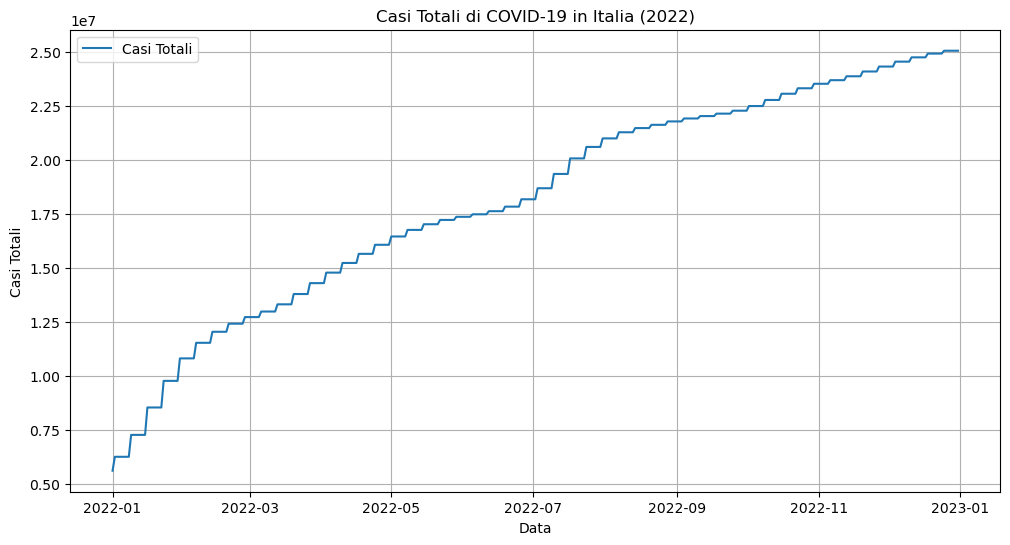

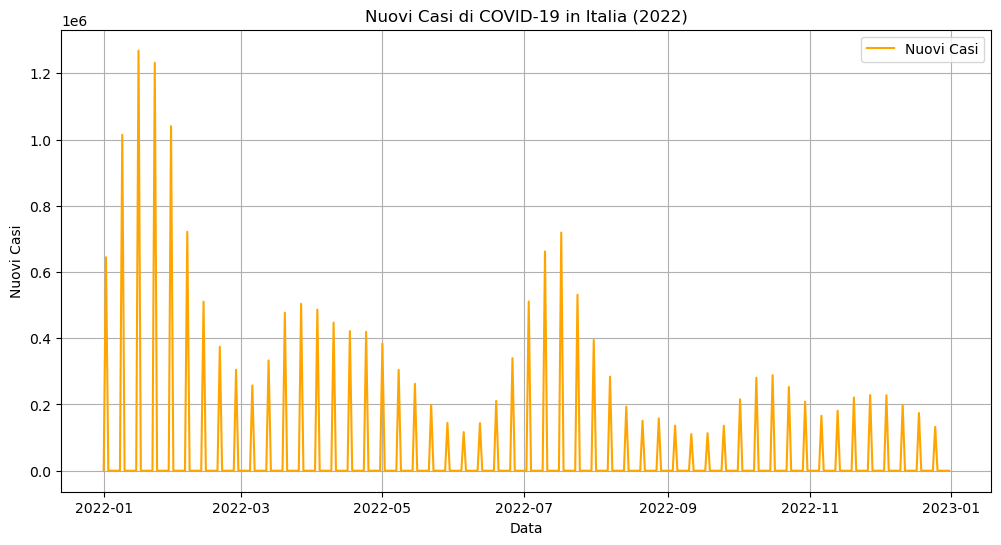

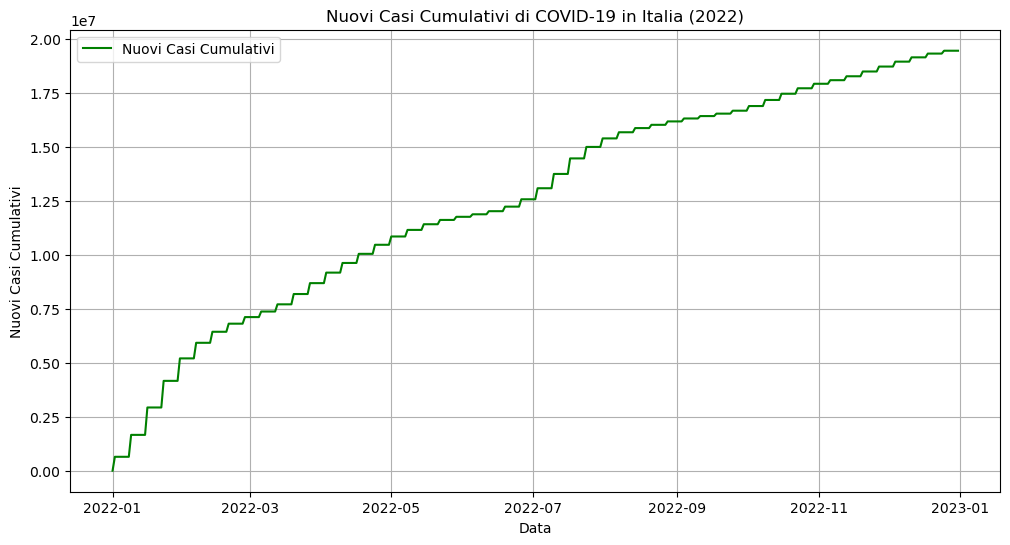

La tendenza dei nuovi casi cumulativi segue strettamente la tendenza dei casi totali, come previsto. Entrambi i grafici mostrano un aumento continuo di casi nel tempo.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

percorso_file = r'C:\Users\Peri\Desktop\Esame pratico Python\owid-covid-data.csv'
csvcovid      = pd.read_csv(percorso_file)

# Filtro i dati per l'Italia nel 2022
csvcovid['date'] = pd.to_datetime(csvcovid['date'])
dati_italia_2022 = csvcovid[(csvcovid['location'] == 'Italy') & (csvcovid['date'].dt.year == 2022)].copy()

# Traccio i casi totali nel tempo
plt.figure(figsize=(12, 6))
plt.plot  (dati_italia_2022['date'], dati_italia_2022['total_cases'], label='Casi Totali')
plt.xlabel('Data')
plt.ylabel('Casi Totali')
plt.title ('Casi Totali di COVID-19 in Italia (2022)')
plt.legend()
plt.grid(True)
plt.show()

# Traccio i nuovi casi nel tempo
plt.figure(figsize=(12, 6))
plt.plot(dati_italia_2022['date'], dati_italia_2022['new_cases'], label='Nuovi Casi', color='orange')
plt.xlabel('Data')
plt.ylabel('Nuovi Casi')
plt.title ('Nuovi Casi di COVID-19 in Italia (2022)')
plt.legend()
plt.grid(True)
plt.show()

# Traccio la somma cumulativa dei nuovi casi nel tempo
dati_italia_2022['cumulative_new_cases'] = dati_italia_2022['new_cases'].cumsum()

plt.figure(figsize=(12, 6))
plt.plot(dati_italia_2022['date'], dati_italia_2022['cumulative_new_cases'], label='Nuovi Casi Cumulativi', color='green')
plt.xlabel('Data')
plt.ylabel('Nuovi Casi Cumulativi')
plt.title ('Nuovi Casi Cumulativi di COVID-19 in Italia (2022)')
plt.legend()
plt.grid(True)
plt.show()

# Confronto le tendenze
casi_totali           = dati_italia_2022['total_cases']
nuovi_casi_cumulativi = dati_italia_2022['cumulative_new_cases']

commento  = "La tendenza dei nuovi casi cumulativi segue strettamente la tendenza dei casi totali, come previsto. Entrambi i grafici mostrano un aumento continuo di casi nel tempo."
print(commento)


5) Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo

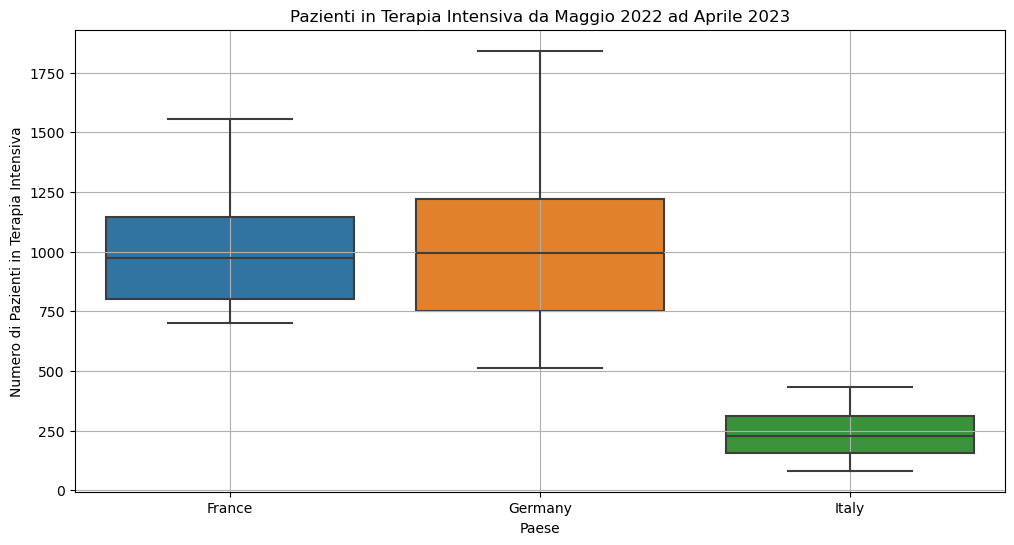


Il boxplot illustra la distribuzione del numero di pazienti in terapia intensiva per Italia, Germania e Francia da maggio 2022 ad aprile 2023.
- Il numero mediano di pazienti in terapia intensiva sembra variare tra i paesi.
- La Germania mostra un intervallo interquartile (IQR) più ampio rispetto all'Italia e alla Francia, indicando una maggiore variabilità nel numero di pazienti in terapia intensiva.
- Italia e Francia hanno mediane e IQR relativamente simili, con meno valori anomali rispetto alla Germania.
Complessivamente, il boxplot suggerisce differenze nei numeri di pazienti in terapia intensiva tra questi paesi, riflettendo le varie risposte sanitarie e gli impatti che ha avuto la pandemia durante questo periodo.



In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


percorso_file = r'C:\Users\Peri\Desktop\Esame pratico Python\owid-covid-data.csv'
csvcovid      = pd.read_csv(percorso_file)

# Converto la colonna 'data' in formato 'datetime'
csvcovid['date'] = pd.to_datetime(csvcovid['date'])

# Filtro i dati per Italia, Germania e Francia da Maggio 2022 ad Aprile 2023
data_inizio   = '2022-05-01'
data_fine     = '2023-04-30'
dati_filtrati = csvcovid[(csvcovid['date'] >= data_inizio) & (csvcovid['date'] <= data_fine) & (csvcovid['location'].isin(['Italy', 'Germany', 'France']))]

# Creo un boxplot per i pazienti in terapia intensiva
plt.figure (figsize=(12, 6))
sns.boxplot(x='location', y='icu_patients', data=dati_filtrati)
plt.xlabel ('Paese')
plt.ylabel ('Numero di Pazienti in Terapia Intensiva')
plt.title  ('Pazienti in Terapia Intensiva da Maggio 2022 ad Aprile 2023')
plt.grid(True)
plt.show()

# Commento breve basato sul boxplot
commento = """
Il boxplot illustra la distribuzione del numero di pazienti in terapia intensiva per Italia, Germania e Francia da maggio 2022 ad aprile 2023.
- Il numero mediano di pazienti in terapia intensiva sembra variare tra i paesi.
- La Germania mostra un intervallo interquartile (IQR) più ampio rispetto all'Italia e alla Francia, indicando una maggiore variabilità nel numero di pazienti in terapia intensiva.
- Italia e Francia hanno mediane e IQR relativamente simili, con meno valori anomali rispetto alla Germania.
Complessivamente, il boxplot suggerisce differenze nei numeri di pazienti in terapia intensiva tra questi paesi, riflettendo le varie risposte sanitarie e gli impatti che ha avuto la pandemia durante questo periodo.
"""
print(commento)


6) Riguardo le nazioni di Germania, Francia, Italia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna - se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.

In [19]:
import pandas as pd


percorso_file = r'C:\Users\Peri\Desktop\Esame pratico Python\owid-covid-data.csv'
csvcovid      = pd.read_csv(percorso_file)

# Estraggo l'anno dalla colonna 'date'
csvcovid['year'] = pd.to_datetime(csvcovid['date']).dt.year

# Seleziono solo le righe relative al 2023 e a Italia, Francia, Spagna, Germania
dati_2023 = csvcovid[(csvcovid['year'] == 2023) & (csvcovid['location'].isin(['Italy', 'France', 'Spain', 'Germany']))]

# Calcolo la somma dei pazienti ospedalizzati per ogni paese e li metto in ordine decrescente
somma_pazienti_ospedalizzati = dati_2023.groupby('location')['hosp_patients'].sum()
somma_pazienti_ospedalizzati = somma_pazienti_ospedalizzati.sort_values(ascending=False)

print(somma_pazienti_ospedalizzati)

location
France    1,382,574
Italy     1,175,272
Spain       354,602
Germany           0
Name: hosp_patients, dtype: float64
